In [1]:
#Importing modules:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Package for flattening json in pandas dataframe
from pandas.io.json import json_normalize

In [2]:
#load json object
with open('../data/food_recall_data.json') as raw_data:
    data = json.load(raw_data)


In [3]:
#Putting data into a pandas df
#Looking at food_recall_data.json
#It shoes parent node is "results"
entire_df = json_normalize(data['results'])
entire_df.head(5)

,address_1,address_2,center_classification_date,city,classification,code_info,country,distribution_pattern,event_id,initial_firm_notification,...,product_type,reason_for_recall,recall_initiation_date,recall_number,recalling_firm,report_date,state,status,termination_date,voluntary_mandated
0,748 S Alameda St,,20120926,Los Angeles,Class II,not available.,United States,California,63150,E-Mail,...,Food,M & K Trading is recalling Korean Molluscan Sh...,20120921,F-2396-2012,M & K Trading Inc,20121003,CA,Terminated,20120926,Voluntary: Firm Initiated
1,4401 Foxdale St,,20120924,Irwindale,Class I,"UPC 7774523746, Use by dates 9/8/2012 or earli...",United States,Nationwide to following US States and Canada: ...,63062,Press Release,...,Food,"Firm is voluntarily recalling, out of an abund...",20120831,F-2382-2012,Ready Pac Foods Inc,20121003,CA,Terminated,20121025,Voluntary: Firm Initiated
2,2315 Moore Ave,,20120927,Fullerton,Class II,"UPC 0-30871-33001-2, Item # 0291710.",United States,Nationwide and Canada.,62991,Letter,...,Food,The firm recalled due to a potential non-safet...,20120712,F-2438-2012,Pulmuone Wildwood Inc,20121003,CA,Terminated,20121217,Voluntary: Firm Initiated
3,2315 Moore Ave,,20120927,Fullerton,Class II,"UPC 0-52334-11659-9, Item # 0291661.",United States,Nationwide and Canada.,62991,Letter,...,Food,The firm recalled due to a potential non-safet...,20120712,F-2436-2012,Pulmuone Wildwood Inc,20121003,CA,Terminated,20121217,Voluntary: Firm Initiated
4,1720 Locust Grove Road,,20120921,Manheim,Class II,"No codes; all product ""Purchase by date shown ...",United States,Product was distributed to specific wholesale ...,62465,Telephone,...,Food,FDA samples of product tested positive for Fum...,20120417,F-2374-2012,Haldeman Mills,20121003,PA,Terminated,20130716,Voluntary: Firm Initiated


In [4]:
entire_df[["center_classification_date","report_date","termination_date"]] = entire_df[["center_classification_date","report_date","termination_date"]].apply(pd.to_datetime)

In [5]:
entire_df.head()

,address_1,address_2,center_classification_date,city,classification,code_info,country,distribution_pattern,event_id,initial_firm_notification,...,product_type,reason_for_recall,recall_initiation_date,recall_number,recalling_firm,report_date,state,status,termination_date,voluntary_mandated
0,748 S Alameda St,,2012-09-26,Los Angeles,Class II,not available.,United States,California,63150,E-Mail,...,Food,M & K Trading is recalling Korean Molluscan Sh...,20120921,F-2396-2012,M & K Trading Inc,2012-10-03,CA,Terminated,2012-09-26,Voluntary: Firm Initiated
1,4401 Foxdale St,,2012-09-24,Irwindale,Class I,"UPC 7774523746, Use by dates 9/8/2012 or earli...",United States,Nationwide to following US States and Canada: ...,63062,Press Release,...,Food,"Firm is voluntarily recalling, out of an abund...",20120831,F-2382-2012,Ready Pac Foods Inc,2012-10-03,CA,Terminated,2012-10-25,Voluntary: Firm Initiated
2,2315 Moore Ave,,2012-09-27,Fullerton,Class II,"UPC 0-30871-33001-2, Item # 0291710.",United States,Nationwide and Canada.,62991,Letter,...,Food,The firm recalled due to a potential non-safet...,20120712,F-2438-2012,Pulmuone Wildwood Inc,2012-10-03,CA,Terminated,2012-12-17,Voluntary: Firm Initiated
3,2315 Moore Ave,,2012-09-27,Fullerton,Class II,"UPC 0-52334-11659-9, Item # 0291661.",United States,Nationwide and Canada.,62991,Letter,...,Food,The firm recalled due to a potential non-safet...,20120712,F-2436-2012,Pulmuone Wildwood Inc,2012-10-03,CA,Terminated,2012-12-17,Voluntary: Firm Initiated
4,1720 Locust Grove Road,,2012-09-21,Manheim,Class II,"No codes; all product ""Purchase by date shown ...",United States,Product was distributed to specific wholesale ...,62465,Telephone,...,Food,FDA samples of product tested positive for Fum...,20120417,F-2374-2012,Haldeman Mills,2012-10-03,PA,Terminated,2013-07-16,Voluntary: Firm Initiated


In [6]:
entire_df.columns

Index(['address_1', 'address_2', 'center_classification_date', 'city',
       'classification', 'code_info', 'country', 'distribution_pattern',
       'event_id', 'initial_firm_notification', 'more_code_info',
       'postal_code', 'product_description', 'product_quantity',
       'product_type', 'reason_for_recall', 'recall_initiation_date',
       'recall_number', 'recalling_firm', 'report_date', 'state', 'status',
       'termination_date', 'voluntary_mandated'],
      dtype='object')

In [7]:
#Data clean up:
clean_df = entire_df.loc[:,["recalling_firm","product_type","country","state","report_date","termination_date","status","voluntary_mandated","classification"]]
clean_df.head()

,recalling_firm,product_type,country,state,report_date,termination_date,status,voluntary_mandated,classification
0,M & K Trading Inc,Food,United States,CA,2012-10-03,2012-09-26,Terminated,Voluntary: Firm Initiated,Class II
1,Ready Pac Foods Inc,Food,United States,CA,2012-10-03,2012-10-25,Terminated,Voluntary: Firm Initiated,Class I
2,Pulmuone Wildwood Inc,Food,United States,CA,2012-10-03,2012-12-17,Terminated,Voluntary: Firm Initiated,Class II
3,Pulmuone Wildwood Inc,Food,United States,CA,2012-10-03,2012-12-17,Terminated,Voluntary: Firm Initiated,Class II
4,Haldeman Mills,Food,United States,PA,2012-10-03,2013-07-16,Terminated,Voluntary: Firm Initiated,Class II


In [8]:
clean_df['year_reported'] = pd.DatetimeIndex(clean_df['report_date']).year
clean_df.head()

,recalling_firm,product_type,country,state,report_date,termination_date,status,voluntary_mandated,classification,year_reported
0,M & K Trading Inc,Food,United States,CA,2012-10-03,2012-09-26,Terminated,Voluntary: Firm Initiated,Class II,2012
1,Ready Pac Foods Inc,Food,United States,CA,2012-10-03,2012-10-25,Terminated,Voluntary: Firm Initiated,Class I,2012
2,Pulmuone Wildwood Inc,Food,United States,CA,2012-10-03,2012-12-17,Terminated,Voluntary: Firm Initiated,Class II,2012
3,Pulmuone Wildwood Inc,Food,United States,CA,2012-10-03,2012-12-17,Terminated,Voluntary: Firm Initiated,Class II,2012
4,Haldeman Mills,Food,United States,PA,2012-10-03,2013-07-16,Terminated,Voluntary: Firm Initiated,Class II,2012


In [9]:
firm_count_df = clean_df
firm_count_df.head()


,recalling_firm,product_type,country,state,report_date,termination_date,status,voluntary_mandated,classification,year_reported
0,M & K Trading Inc,Food,United States,CA,2012-10-03,2012-09-26,Terminated,Voluntary: Firm Initiated,Class II,2012
1,Ready Pac Foods Inc,Food,United States,CA,2012-10-03,2012-10-25,Terminated,Voluntary: Firm Initiated,Class I,2012
2,Pulmuone Wildwood Inc,Food,United States,CA,2012-10-03,2012-12-17,Terminated,Voluntary: Firm Initiated,Class II,2012
3,Pulmuone Wildwood Inc,Food,United States,CA,2012-10-03,2012-12-17,Terminated,Voluntary: Firm Initiated,Class II,2012
4,Haldeman Mills,Food,United States,PA,2012-10-03,2013-07-16,Terminated,Voluntary: Firm Initiated,Class II,2012


In [10]:
firm_count = clean_df.groupby(['recalling_firm']).size().reset_index(name='counts')
firm_sorted = firm_count.sort_values(['counts'], ascending=False)
firm15 = firm_sorted.head(15)
firm15

,recalling_firm,counts
1026,"Garden-Fresh Foods, Inc.",633
1955,Newly Weds Foods Inc,381
1096,"Good Herbs, Inc.",353
313,"Blue Bell Creameries, L.P.",292
2351,"Reser's Fine Foods, Inc.",219
2666,"Sunland, Incorporated",219
3033,Whole Foods Market,214
2732,Target Corporation,199
1260,High Liner Foods Inc.,187
2674,Sunset Natural Products Inc.,173


In [31]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Scatter(
    x=firm15["recalling_firm"],
    y = firm15["counts"])
]

#url = py.plot(data, filename = "recalling_firm")
py.iplot(data, filename = "recalling_firm")



In [11]:
state_count = clean_df.groupby(['state']).size().reset_index(name='counts')
#firm_sorted = firm_count.sort_values(['counts'], ascending=False)
#firm15 = firm_sorted.head(15)
state_count

,state,counts
0,,127
1,AK,54
2,AL,28
3,AR,32
4,AZ,150
5,Alberta,2
6,British Columbia,1
7,CA,2242
8,CO,197
9,CT,90


In [12]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
df = state_count

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

#df['text'] = df['state'] + '<br>' + \
#    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
 #   'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
  #  'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df['state'],
    z = df['counts'].astype(float),
    locationmode = 'USA-states',
#    text = df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "# of Recalls")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2012-2019 US FDA Recall Counts by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jatinku/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [13]:
classification_count = clean_df.groupby(['classification']).size().reset_index(name='counts')
classification_count

,classification,counts
0,Class I,7707
1,Class II,8874
2,Class III,1009
3,Not Yet Classified,31


In [14]:
yearly_count = clean_df.groupby(['year_reported']).size().reset_index(name='counts')
yearly_count

,year_reported,counts
0,2012,1916
1,2013,2108
2,2014,2259
3,2015,2835
4,2016,3012
5,2017,3187
6,2018,1905
7,2019,399


In [15]:
status_count = clean_df.groupby(['status']).size().reset_index(name='counts')
status_count

,status,counts
0,Completed,202
1,Ongoing,1731
2,Terminated,15688


In [21]:
vol_man_count_df = clean_df.groupby(['voluntary_mandated']).size().reset_index(name='counts')
vol_man_count_df.head()

,voluntary_mandated,counts
0,FDA Mandated,310
1,Voluntary: FDA Requested,2
2,Voluntary: Firm Initiated,17309


In [22]:
# Labels for the sections of our pie chart
labels = ["FDA Mandated","Voluntry FDA","Voluntary Firm"]

# The values of each section of the pie chart
sizes = [310, 2, 17309]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

([<matplotlib.patches.Wedge at 0x218b1047a58>,
 [Text(-0.960459,0.719387,'FDA Mandated'),
  Text(-0.915722,0.60947,'Voluntry FDA'),
  Text(0.880656,-0.659124,'Voluntary Firm')],
 [Text(-0.560268,0.419642,'1.8%'),
  Text(-0.499485,0.332438,'0.0%'),
  Text(0.480358,-0.359522,'98.2%')])

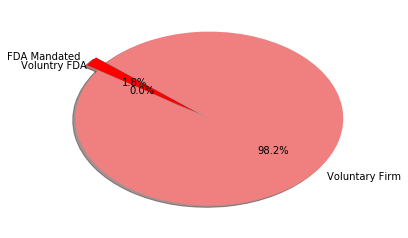

In [23]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [ ]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

In [16]:
country_count_df = clean_df.groupby(['country']).size().reset_index(name='counts')
country_count_df

,country,counts
0,Armenia,4
1,Australia,1
2,Belgium,1
3,Canada,75
4,Chile,5
5,China,1
6,Costa Rica,2
7,Dominican Republic (the),1
8,Egypt,3
9,France,10


In [17]:
# Create connection to SQL Database
#from sqlalchemy import create_engine
#engine = create_engine('sqlite:///../data/food_recall.sqlite', echo=False)

In [27]:
# Create new table on SQL database
#clean_df.to_sql('food_recall', con=engine)

In [28]:
#engine.execute('SELECT * FROM food_recall').fetchall()